# Model Complexity

Ok, so thus far I've tried to see if I can recover the performance of the hybrid training on the $t\bar{t}$ sample by
1. Reweighting to the b-jet $p_T$ spectrum 
2. Training with more events.

Neither of these really had an effect on the performance, but Michael suggested that I could try increasing the model complexity to see if that helped me at all.

For starters, I tried increasing the model capactity to 75 nodes to see if that helped the hybrid training at all.


In [16]:
import numpy as np
import h5py
import sys
import pandas as pd
import xarray as xr

sys.path.append("../..")
from usefulFcts import *
from trainNet import *
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
HYBRID_SAMPLE = "hybrid_1.5TeV"

In [18]:
dataDir = '../../data/mc16d_PFlow_ttbar'
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTag = "2mtest_15trks_{}_sd0_rev_{}_scale".format(vStr,HYBRID_SAMPLE)

f_name = "{}/data_{}.hdf5".format(dataDir,dataTag)

f = h5py.File(f_name,"r")

X = f['X_test'][:]
y = f['y_test'][:]
ix = f['ix_test'][:]

f.close()

nTest,nTrks,nFeatures = X.shape

In [19]:
subDir = 'mc16d_PFlow_{}'.format(HYBRID_SAMPLE)
figDir = '../../figures/'
modelDir = '../../models/'+subDir

Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


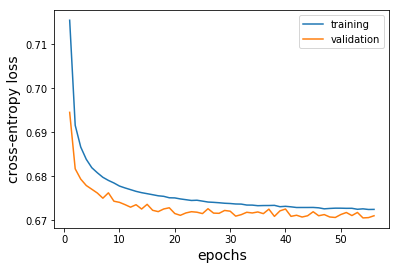

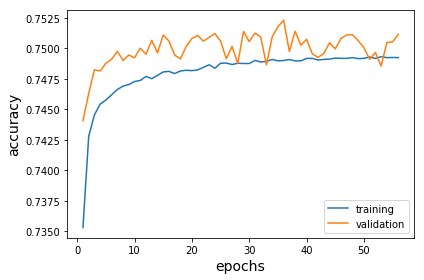

Load in the previously saved efficiency file
Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


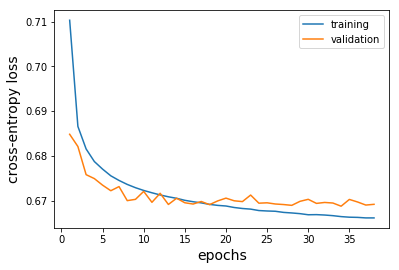

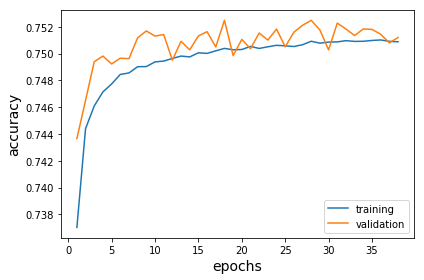

Load in the previously saved efficiency file
Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


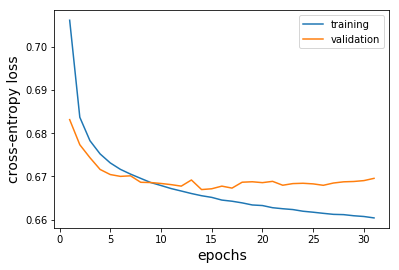

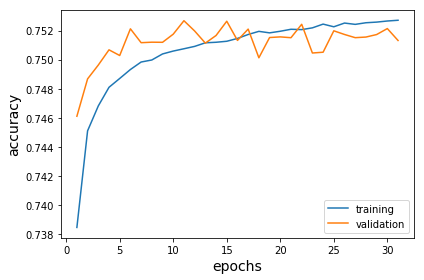

Load in the previously saved efficiency file
Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


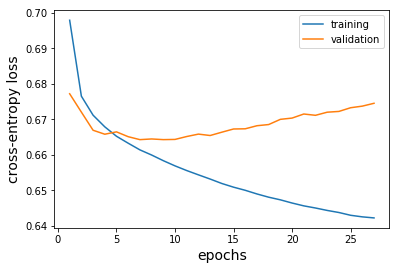

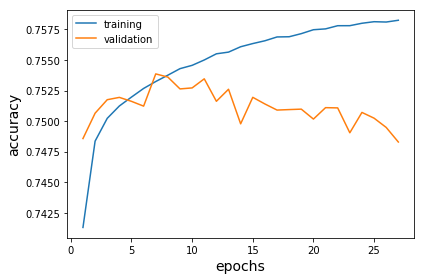

Load in the previously saved efficiency file
Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


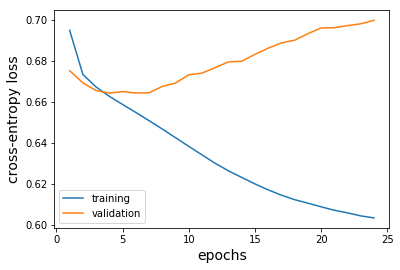

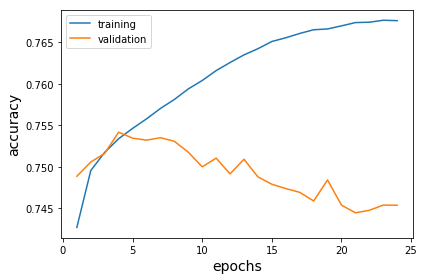

Load in the previously saved efficiency file


In [20]:
leffs, ceffs, beffs = [],[],[]

for nHidden,nMillion in zip([50,75,100,200,400],[4,4,4,5,5]):

    dataTagTrain = "{}mtrain_15trks_{}_sd0_rev".format(nMillion,vStr)
    
    m = myLSTM(modelDir=modelDir, nFeatures=nFeatures, nHidden=nHidden, dataTag=dataTagTrain, loadModel=True)
    trainingMetrics(m.modelName,modelDir=modelDir)

    # Get the efficiencies
    (leff, ceff, beff), d = getEffs(m, X, y, ix, returnDisc=True,
                                    figDir=figDir,subDir=subDir,modelDir=modelDir)

    leffs.append(leff)
    ceffs.append(ceff)
    beffs.append(beff)

../../plottingFcts.py:581: RuntimeWarning: invalid value encountered in sqrt
  eff_err = lambda x, N: np.sqrt( x*(1-x) / N)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:117: RuntimeWarning: invalid value encountered in multiply
  d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk


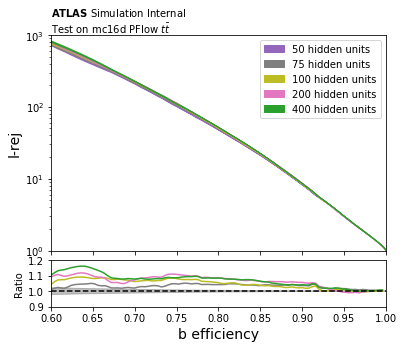

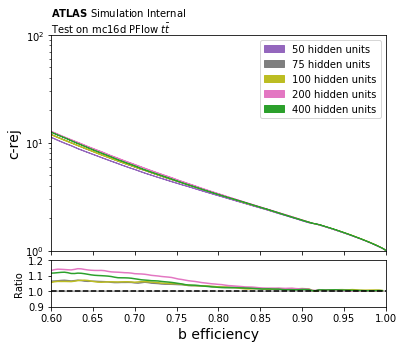

In [21]:
labels=['{} hidden units'.format(x) for x in [50,75,100,200, 400]]
plotTag = 'rej_ttbar_vary_nHidden'

text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"Test on mc16d PFlow $t\bar{t}$"

colors = ['C4','C7','C8','C6','C2']

plotROCRatio(beffs, leffs, labels, rrange=(0.9,1.2),ymax=1000,
             text=text,ylabel='l-rej',binomialErrors=True,nTest=nTest, 
             colors=colors, figDir=figDir,
             subDir=subDir,tag='l'+plotTag)

plotROCRatio(beffs, ceffs, labels, rrange=(0.9,1.2),ymax=100,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=nTest, 
             colors=colors, figDir=figDir,
             subDir=subDir,tag='c'+plotTag)

In [8]:
subDir

'mc16d_PFlow_hybrid_1.5TeV'

## Studies on $t\bar{t}$

For the studies that I presented at [P&P week](https://indico.cern.ch/event/787930/contributions/3280581/attachments/1781904/2901443/Hartman_Jan_22_19.pdf) I was comparing the hybrid model that I trained with 200 hidden units to the$t\bar{t}$ model that I trained with 50 hidden units. But, I think it's worthwhile to compare against a $t\bar{t}$ model optimized to the correct number of hidden units as well.

In [22]:
dataTag = "2mtest_15trks_{}_sd0_rev".format(vStr)

f_name = "{}/data_{}.hdf5".format(dataDir,dataTag)

f = h5py.File(f_name,"r")

X = f['X_test'][:]
y = f['y_test'][:]
ix = f['ix_test'][:]

f.close()

In [23]:
subDir = 'mc16d_PFlow_ttbar'
modelDir = '../../models/'+subDir

Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


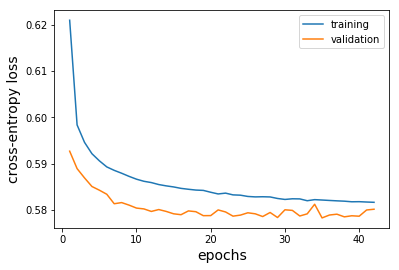

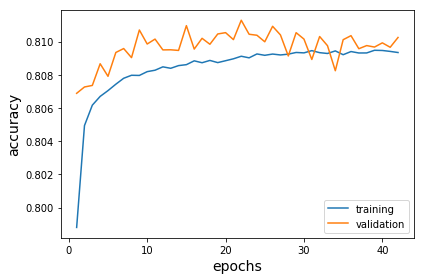

min: -7.11, max: 11.23


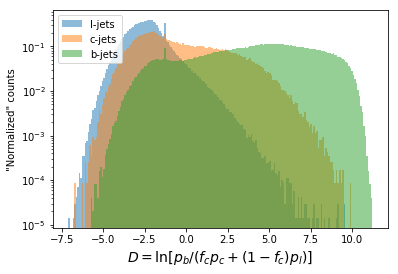

Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


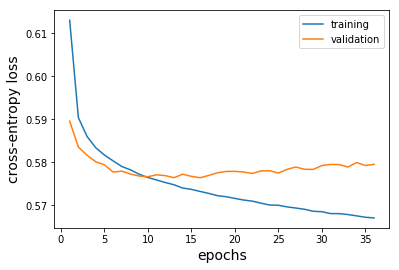

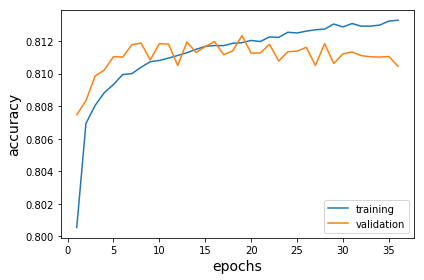

min: -6.86, max: 12.35


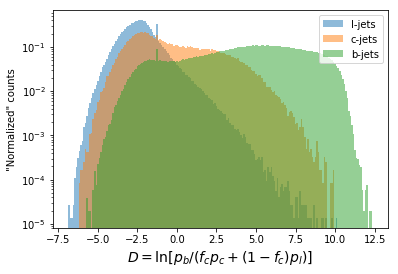

Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


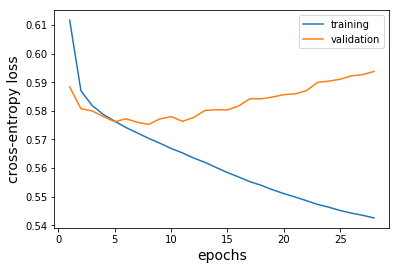

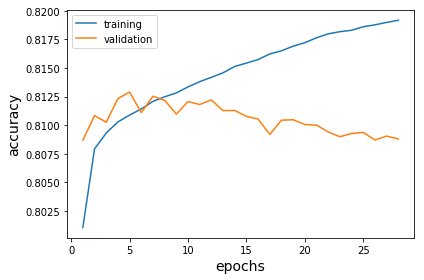

min: -7.21, max: 13.29


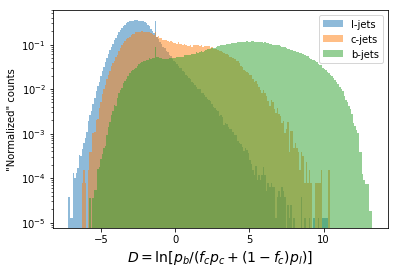

In [24]:
leffs, ceffs, beffs = [],[],[]

for nHidden in [50,100,200]:

    dataTagTrain = "3mtrain_15trks_{}_sd0_rev".format(vStr)
    
    m = myLSTM(modelDir=modelDir, nFeatures=nFeatures, nHidden=nHidden, dataTag=dataTagTrain, loadModel=True)
    trainingMetrics(m.modelName,modelDir=modelDir)

    # Get the efficiencies
    leff, ceff, beff = sigBkgEff(m, X, y, ix, figDir=figDir,subDir=subDir,modelDir=modelDir)

    leffs.append(leff)
    ceffs.append(ceff)
    beffs.append(beff)

In [14]:
subDir

'mc16d_PFlow_ttbar'

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:117: RuntimeWarning: invalid value encountered in multiply
  d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)
../../plottingFcts.py:581: RuntimeWarning: invalid value encountered in sqrt
  eff_err = lambda x, N: np.sqrt( x*(1-x) / N)


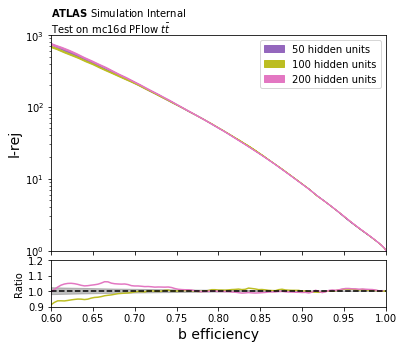

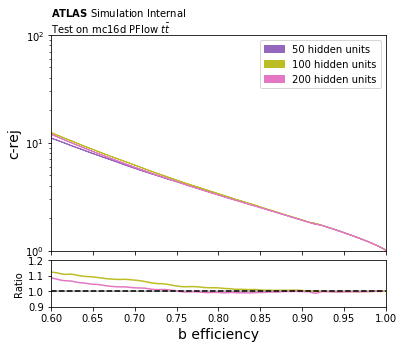

In [15]:
labels=['{} hidden units'.format(x) for x in [50,100,200]]
plotTag = 'rej_ttbar_vary_nHidden'

text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"Test on mc16d PFlow $t\bar{t}$"

colors = ['C4','C8','C6']

plotROCRatio(beffs, leffs, labels, rrange=(0.9,1.2),ymax=1000,
             text=text,ylabel='l-rej',binomialErrors=True,nTest=nTest, 
             colors=colors, figDir=figDir,
             subDir=subDir,tag='l'+plotTag)

plotROCRatio(beffs, ceffs, labels, rrange=(0.9,1.2),ymax=100,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=nTest, 
             colors=colors, figDir=figDir,
             subDir=subDir,tag='c'+plotTag)

It really does not seem to be making a big difference for $t\bar{t}$ how many hidden units we have. Maybe I should be increasing the number of training events to avoid over-fitting though?

## Studies on extended hybrid

For my first pass on the extended hybrid I tried training with 200 hidden units, since that seemed to be sufficient for the standard hybrid training.

However with my first pass on the Extended-Hybrid notebook, it seemed like the model had not really converged, so I thought I might need to play this trick again with increasing the number of hidden units, so I tried 300, 400, and 500. 

Let's see which performaed best and what trends we could uncover!

In [6]:
HYBRID_SAMPLE = 'hybrid_5TeV'

In [7]:
dataTag = "2mtest_15trks_{}_sd0_rev_{}_scale".format(vStr,HYBRID_SAMPLE)

f_name = "{}/data_{}.hdf5".format(dataDir,dataTag)

f = h5py.File(f_name,"r")

X = f['X_test'][:]
y = f['y_test'][:]
ix = f['ix_test'][:]

f.close()

subDir = 'mc16d_PFlow_{}'.format(HYBRID_SAMPLE)
modelDir = '../../models/'+subDir

Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


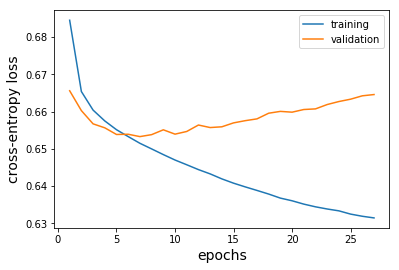

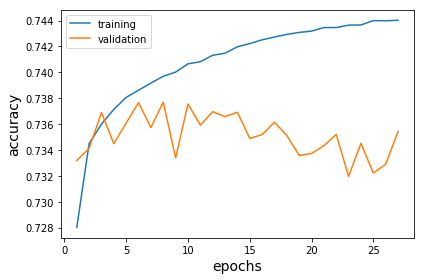

Load in the previously saved efficiency file
Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


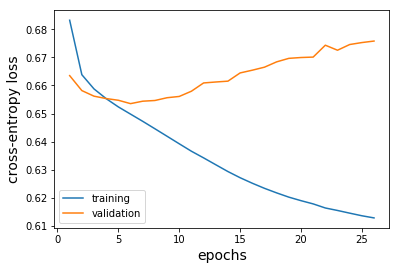

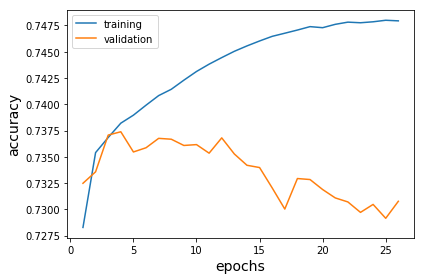

min: -9.68, max: 13.39


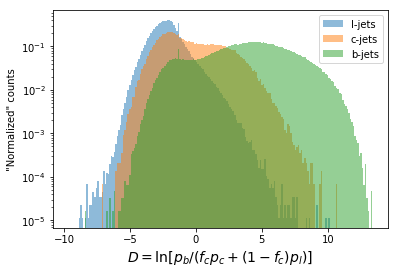

Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


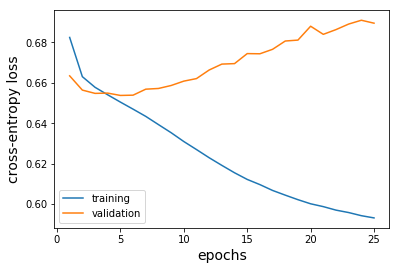

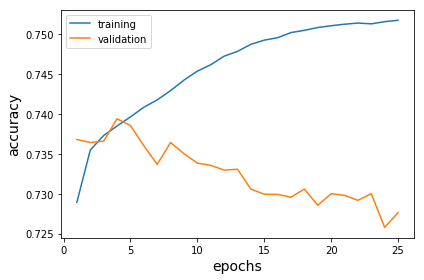

min: -12.13, max: 13.40


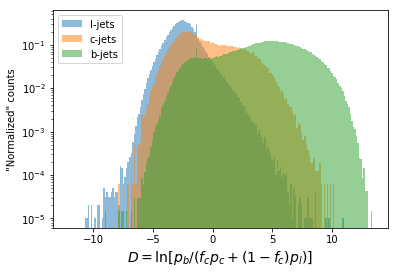

Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


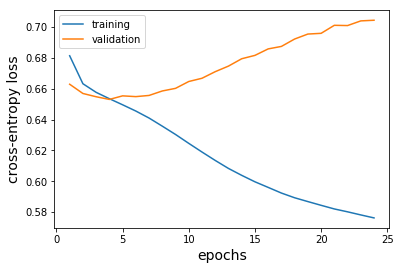

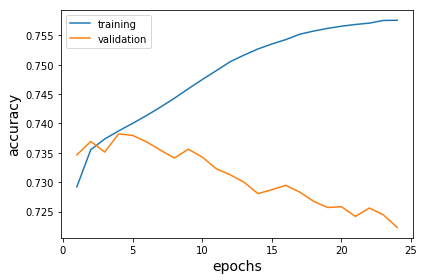

min: -12.89, max: 13.04


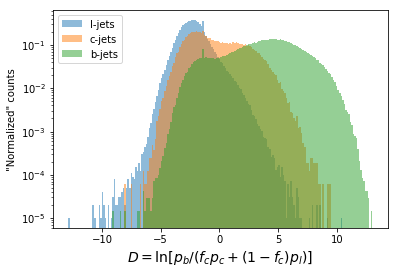

In [8]:
leffs, ceffs, beffs = [],[],[]

for nHidden in [200,300,400,500]:

    dataTagTrain = "5mtrain_15trks_{}_sd0_rev".format(vStr)
    
    m = myLSTM(modelDir=modelDir, nFeatures=nFeatures, nHidden=nHidden, dataTag=dataTagTrain, loadModel=True)
    trainingMetrics(m.modelName,modelDir=modelDir)

    # Get the efficiencies
    tag = '_eval_ttbar'
    leff, ceff, beff = getEffs(m, X, y, ix, figDir=figDir, subDir=subDir,
                               modelDir=modelDir,tag=tag)

    leffs.append(leff)
    ceffs.append(ceff)
    beffs.append(beff)

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
../../plottingFcts.py:581: RuntimeWarning: invalid value encountered in sqrt
  eff_err = lambda x, N: np.sqrt( x*(1-x) / N)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:117: RuntimeWarning: invalid value encountered in multiply
  d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)


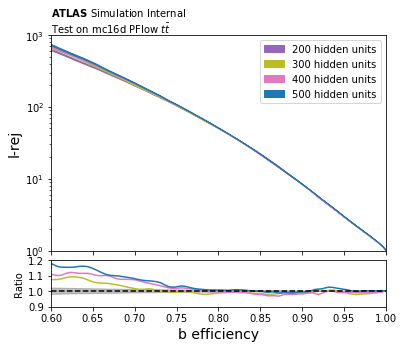

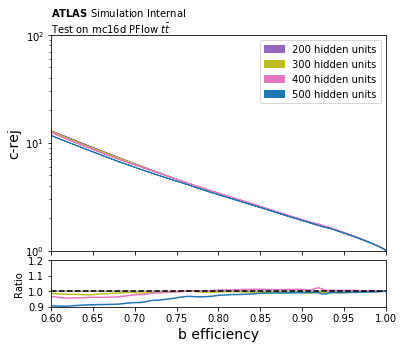

In [15]:
labels=['{} hidden units'.format(x) for x in [200,300,400,500]]
plotTag = 'rej_ttbar_vary_nHidden'

text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"Test on mc16d PFlow $t\bar{t}$"

colors = ['C4','C8','C6','C0']

plotROCRatio(beffs, leffs, labels, rrange=(0.9,1.2),ymax=1000,
             text=text,ylabel='l-rej',binomialErrors=True,nTest=nTest, 
             colors=colors, figDir=figDir,
             subDir=subDir,tag='l'+plotTag)

plotROCRatio(beffs, ceffs, labels, rrange=(0.9,1.2),ymax=100,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=nTest, 
             colors=colors, figDir=figDir,
             subDir=subDir,tag='c'+plotTag)

It seems interesting to me that increasing the model complexity is *helping* us in terms of the l-rej, but hurting us in terms of c-rej.

I think the message of these plots is that using 400 hidden units should be sufficient for this extended hybrid training.